# Exploratory Analysis of Prosper Loan Data
## by Yuseon Joung

## Preliminary Wrangling

> Prosper is a peer-to-peer lending company where individuals can either invest in personal loans or request to borrow money on a website. In this exploratory analysis, we will analysis variables associated with the fluctuations in the Borrower Rate and loans that are defaulted.   

In [14]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Here I loaded the dataset and made a smaller dataframe with only the variables that are in the scope of the analysis.

In [15]:
# read the csv file and create a dataframe
loan_df = pd.read_csv('prosperLoanData.csv')
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [16]:
# check the size of the data
print(loan_df.shape)
print(loan_df.dtypes)

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


In [17]:
# display more rows and columns of the dataframe
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [18]:
# check the duplicated data and the numbers of null_values
print(sum(loan_df.duplicated()))
print(loan_df.isnull().sum())

0
ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner             

In [19]:
# explore the descriptive statistics of the data 
loan_df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [20]:
list(loan_df.columns)

['ListingKey',
 'ListingNumber',
 'ListingCreationDate',
 'CreditGrade',
 'Term',
 'LoanStatus',
 'ClosedDate',
 'BorrowerAPR',
 'BorrowerRate',
 'LenderYield',
 'EstimatedEffectiveYield',
 'EstimatedLoss',
 'EstimatedReturn',
 'ProsperRating (numeric)',
 'ProsperRating (Alpha)',
 'ProsperScore',
 'ListingCategory (numeric)',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'EmploymentStatusDuration',
 'IsBorrowerHomeowner',
 'CurrentlyInGroup',
 'GroupKey',
 'DateCreditPulled',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'FirstRecordedCreditLine',
 'CurrentCreditLines',
 'OpenCreditLines',
 'TotalCreditLinespast7years',
 'OpenRevolvingAccounts',
 'OpenRevolvingMonthlyPayment',
 'InquiriesLast6Months',
 'TotalInquiries',
 'CurrentDelinquencies',
 'AmountDelinquent',
 'DelinquenciesLast7Years',
 'PublicRecordsLast10Years',
 'PublicRecordsLast12Months',
 'RevolvingCreditBalance',
 'BankcardUtilization',
 'AvailableBankcardCredit',
 'TotalTrades',
 'TradesNeverDelinquent (p

In [21]:
# remove columns that are out of the research scope
loan_df2 = loan_df.copy()
loan_df2.drop(['ListingCategory (numeric)', 'BorrowerState', 'EmploymentStatusDuration',
 'IncomeVerifiable', 'LoanNumber', 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees',
 'LP_ServiceFees', 'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss', 'LP_NonPrincipalRecoverypayments', 'PercentFunded',
 'Recommendations', 'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount', 'Investors'], axis=1, inplace = True)
loan_df2.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,Occupation,EmploymentStatus,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,Other,Self-employed,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,Professional,Employed,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,Other,Not available,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,Skilled Labor,Employed,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,Executive,Employed,True,False,NaN,2013-09-14 18:38:44,680.0,699.0,2004-02-20 00:00:00,19.0,19.0,49.0,6,220.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,6193.0,0.81,695.0,39.0,0.95,2.0,0.26,"$100,000+",9583.333333,A180369302188889200689E,1.0,11.0,11.0,0.0,0.0,11000.0,9947.9,NaN,0,NaN,6,15000,2013-09-20 00:00:00,Q3 2013,36CE356043264555721F06C,563.97


In [22]:
# remove the rows that have null values in BorrowerAPR column
loan_df2 = loan_df2[loan_df2['BorrowerAPR'].isnull()==False]

In [23]:
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113912 entries, 0 to 113936
Data columns (total 63 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113912 non-null  object 
 1   ListingNumber                        113912 non-null  int64  
 2   ListingCreationDate                  113912 non-null  object 
 3   CreditGrade                          28928 non-null   object 
 4   Term                                 113912 non-null  int64  
 5   LoanStatus                           113912 non-null  object 
 6   ClosedDate                           55064 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113912 non-null  float64
 9   LenderYield                          113912 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What is the structure of your dataset?

> The data has a total of 113,947 rows and 81 columns without any duplicated entries. 

### What is/are the main feature(s) of interest in your dataset?

> This analysis will focus on the changes in the borrower's APR, borrower's rate and the defaulted loans. They can the variables that can show the risks in the market. I selected variables that could have influenced the topic of my analysis such as ProsperScore, Occupation, Monthly Loan Payment and Employment Status. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The dataset already has several variables that helps analyze the information in different types (category, numeric etc). Therefore, we can explore the data from various aspects.   

## Univariate Exploration

> I will start the investigation by comparing the distribution of the Borrower's APR and the Borrower Rate.

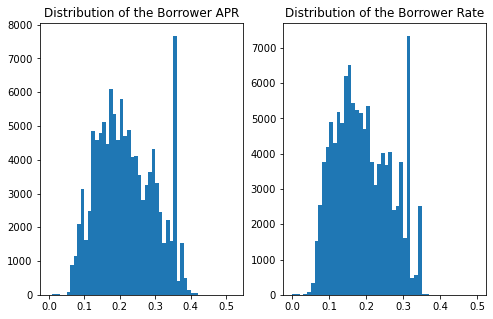

In [24]:
# Plot the histogram of the Borrower's APR and Borrower Rate to see the distribution

plt.figure(figsize = [8, 5])

ax1 = plt.subplot(1, 2, 1)
ax1.set_title('Distribution of the Borrower APR')
bins = np.arange(0, loan_df2['BorrowerAPR'].max()+0.01, 0.01)
plt.hist(data = loan_df2, x = 'BorrowerAPR', bins = bins);

ax2 = plt.subplot(1, 2, 2)
ax2.set_title('Distribution of the Borrower Rate')
bins = np.arange(0, loan_df2['BorrowerRate'].max()+0.01, 0.01)
plt.hist(data = loan_df2, x = 'BorrowerRate', bins = bins);

> From the both of the histogram, it looks like Borrower APR and Borrower Rate has a very similar distribution. Both of them shows an outlier from the Borrower APR/Borrower Rate around 0.35.

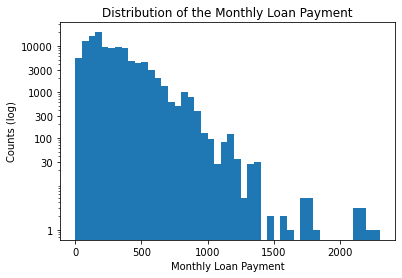

In [25]:
# MonthlyLoanPayment 

bins = np.arange(0, loan_df2['MonthlyLoanPayment'].max()+50, 50)
plt.hist(data = loan_df2, x = 'MonthlyLoanPayment', bins = bins)

ticks=[1, 30, 100, 300, 1000,3000, 10000]
labels=['{}'.format(v) for v in ticks]
plt.yscale('log')
plt.yticks(ticks, labels)

plt.title('Distribution of the Monthly Loan Payment')
plt.xlabel('Monthly Loan Payment')
plt.ylabel('Counts (log)');

> Most of the monthly loan payments are less than USD 750. 

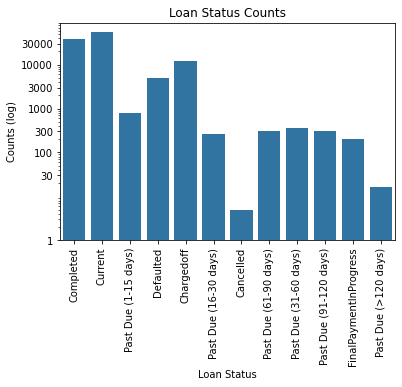

In [26]:
# Loanstatus 
base_color = sb.color_palette()[0]

sb.countplot(data=loan_df2, x='LoanStatus', color = base_color)
plt.xticks(rotation=90)

ticks=[1, 30, 100, 300, 1000,3000, 10000, 30000]
labels=['{}'.format(v) for v in ticks]
plt.yscale('log')
plt.yticks(ticks, labels)

plt.title('Loan Status Counts')
plt.xlabel('Loan Status')
plt.ylabel('Counts (log)');

> In general, more loans are completed or current. Defaulted loans are less than 1 % of the total loans. 

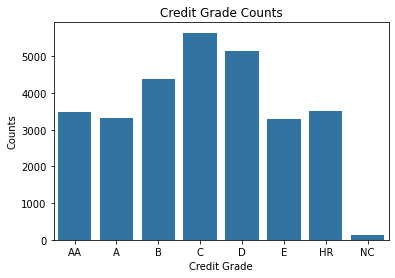

In [27]:
# CreditGrade

base_color = sb.color_palette()[0]
credit_grading_order = ['AA','A', 'B', 'C', 'D', 'E', 'HR','NC']

sb.countplot(data=loan_df2, x='CreditGrade', color = base_color, order = credit_grading_order)

plt.title('Credit Grade Counts')
plt.xlabel('Credit Grade')
plt.ylabel('Counts');

> AA is the highest credit grate meanwhile HR is the lowest. Moreover, this rating system is only available for pre-2009 period. Majority of the populations are located from B to E. 

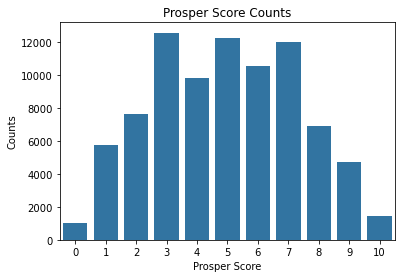

In [28]:
# ProsperScore 
base_color = sb.color_palette()[0]
sb.countplot(data=loan_df2, x='ProsperScore', color = base_color)

tick =np.arange(0, 11, 1)
plt.xticks (tick, tick)

plt.title('Prosper Score Counts')
plt.xlabel('Prosper Score')
plt.ylabel('Counts');

> Prosper Score is a custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score, applicable for loans originated after July 2009. It shoes that the majority of the Prosper Score are between 3 to 7. 

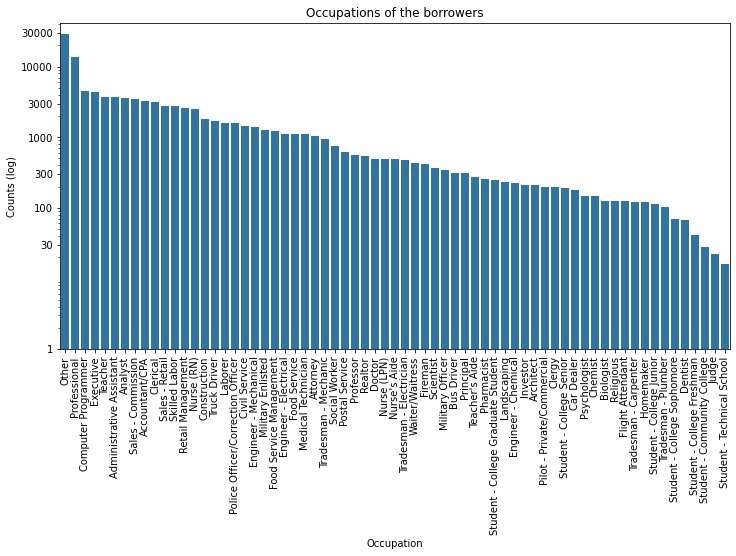

In [29]:
#Occupation

plt.figure(figsize=[12, 6])

base_color = sb.color_palette()[0]
sb.countplot(data=loan_df2, x='Occupation', color = base_color, order =loan_df2['Occupation'].value_counts().index)

ticks=[1, 30, 100, 300, 1000,3000, 10000, 30000]
labels=['{}'.format(v) for v in ticks]
plt.yscale('log')
plt.yticks(ticks, labels)

plt.title('Occupations of the borrowers')
plt.xticks(rotation = 90)
plt.ylabel('Counts (log)');

> The occupatios of the borrowers are diversified. As the variables with the higher numbers are 'Other' or 'Professional', it is quite vague to discover a tendency. Therefore, I will move to ehe numeric variable StatedMonthly Income and see its distribution. 

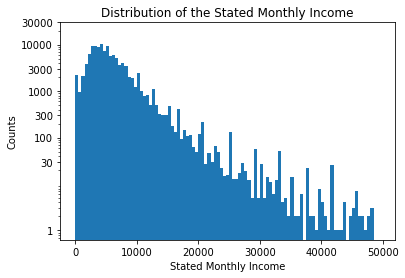

In [30]:
#StatedMonthlyIncome

bins= np.arange(0, 50000, 500)
plt.hist(data = loan_df2, x = 'StatedMonthlyIncome', bins=bins)

ticks=[1, 30, 100, 300, 1000,3000, 10000, 30000]
labels=['{}'.format(v) for v in ticks]
plt.yscale('log')
plt.yticks(ticks, labels)

plt.title('Distribution of the Stated Monthly Income')
plt.xlabel('Stated Monthly Income')
plt.ylabel('Counts');

> People with the stated monthly income under USD 10,000 are the most common among the borrowers.  

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There were outliers which make two-peak distribution of the data at the higher value (at the right of the X Axis) of the Borrower APR, Borrower Rate, Monthly Loan Payment, and Stated Monthly income. I did perform any transformation of the data at this stage.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Meanwhile Credit Grade and the Prosper Score show normal distribution, the rest of the distribution showed mostly right-skewed distribution with a second peak at the higher value. I did perform any transformation of the data at this stage.

## Bivariate Exploration

> In this section, I will more actively investigate the variables that are associated with the interest rate and the loan status. 

In [31]:
# Change the ListingCreationDate and ClosedDate into the datatype Datetime 
loan_df2['ListingCreationDate']= pd.to_datetime(loan_df2['ListingCreationDate'])
loan_df2['ClosedDate']= pd.to_datetime(loan_df2['ClosedDate'])
loan_df2.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,Occupation,EmploymentStatus,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,C,36,Completed,2009-08-14,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,Other,Self-employed,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,NaN,36,Current,NaT,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,Professional,Employed,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,HR,36,Completed,2009-12-17,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,Other,Not available,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,NaN,36,Current,NaT,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,Skilled Labor,Employed,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,NaN,36,Current,NaT,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,Executive,Employed,True,False,NaN,2013-09-14 18:38:44,680.0,699.0,2004-02-20 00:00:00,19.0,19.0,49.0,6,220.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,6193.0,0.81,695.0,39.0,0.95,2.0,0.26,"$100,000+",9583.333333,A180369302188889200689E,1.0,11.0,11.0,0.0,0.0,11000.0,9947.9,NaN,0,NaN,6,15000,2013-09-20 00:00:00,Q3 2013,36CE356043264555721F06C,563.97


In [32]:
# Check the data types
loan_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113912 entries, 0 to 113936
Data columns (total 63 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113912 non-null  object        
 1   ListingNumber                        113912 non-null  int64         
 2   ListingCreationDate                  113912 non-null  datetime64[ns]
 3   CreditGrade                          28928 non-null   object        
 4   Term                                 113912 non-null  int64         
 5   LoanStatus                           113912 non-null  object        
 6   ClosedDate                           55064 non-null   datetime64[ns]
 7   BorrowerAPR                          113912 non-null  float64       
 8   BorrowerRate                         113912 non-null  float64       
 9   LenderYield                          113912 non-null  float64       
 

In [33]:
#Create a ListingCreationYear with only the year information 
loan_df2['ListingCreationYear'] = pd.DatetimeIndex(loan_df2['ListingCreationDate']).year
loan_df2.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,Occupation,EmploymentStatus,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,ListingCreationYear
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,C,36,Completed,2009-08-14,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,Other,Self-employed,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,2007
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,NaN,36,Current,NaT,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,Professional,Employed,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,2014
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,HR,36,Completed,2009-12-17,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,Other,Not available,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,2007
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,NaN,36,Current,NaT,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,Skilled Labor,Employed,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,2012
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,NaN,36,Current,NaT,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,Executive,Employed,True,False,NaN,2013-09-14 18:38:44,680.0,699.0,2004-02-20 00:00:00,19.0,19.0,49.0,6,220.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,6193.0,0.81,695.0,39.0,0.95,2.0,0.26,"$100,000+",9583.333333,A180369302188889200689E,1.0,11.0,11.0,0.0,0.0,11000.0,9947.9,NaN,0,NaN,6,15000,2013-09-20 00:00:00,Q3 2013,36CE356043264555721F06C,563.97,2013


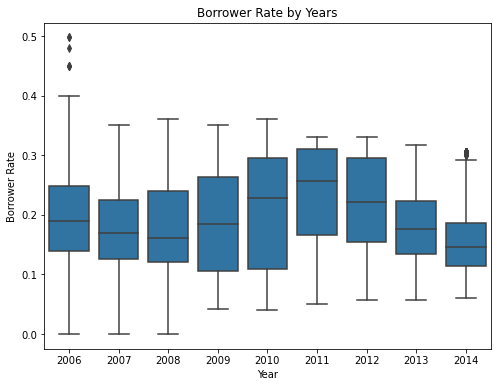

In [34]:
# Year and the Borrowers Rate

plt.figure(figsize=[8, 6])
base=sb.color_palette()[0]
sb.boxplot(data = loan_df2, x= 'ListingCreationYear',y = 'BorrowerRate', color =base)

plt.title('Borrower Rate by Years')
plt.xlabel('Year')
plt.ylabel('Borrower Rate');

> The median of the Borrower Rate decreased from 2006 to 2008, increased from 2008 to 2011 and again started decreasing from 2011 to 2014.

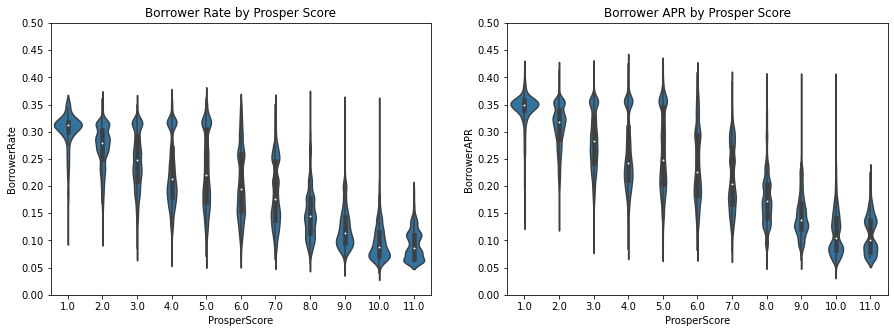

In [35]:
# ProsperScore and the Borrower Rate

plt.figure(figsize=[15, 5])

ax1 = plt.subplot(1, 2, 1)
base=sb.color_palette()[0]
sb.violinplot(data = loan_df2, x= 'ProsperScore',y = 'BorrowerRate', color =base);
ax1.set_title('Borrower Rate by Prosper Score')
ticks= np.arange(0, loan_df2['BorrowerAPR'].max()+0.01, 0.05)
label=['{:0.02f}'.format(v) for v in ticks ]
plt.yticks(ticks, label)


# ProsperScore and the BorrowerAPR

ax2 = plt.subplot(1, 2, 2)
base=sb.color_palette()[0]
sb.violinplot(data = loan_df2, x= 'ProsperScore',y = 'BorrowerAPR', color =base);
ax2.set_title('Borrower APR by Prosper Score')
ticks= np.arange(0, loan_df2['BorrowerAPR'].max()+0.01, 0.05)
label=['{:0.02f}'.format(v) for v in ticks ]
plt.yticks(ticks, label);

> Prosper Score and Borrower Rate / Borrower Rate shows inverse proportions. This is understandable, as lenders find a borrower with a low Prosper Score more risky and therefore request a higher interest rate. 

In [36]:
# Make a dataframe that contains Average MonthlyLoanPayment and Occupation
MLP_OCC_df = pd.DataFrame(loan_df2.groupby(['Occupation'])['MonthlyLoanPayment'].mean())
MLP_OCC_df.reset_index(inplace=True)
MLP_OCC_df.sort_values(by=['MonthlyLoanPayment'], inplace=True)
MLP_OCC_df

,Occupation,MonthlyLoanPayment
56,Student - College Sophomore,103.860145
54,Student - College Junior,104.727500
52,Student - College Freshman,119.732195
55,Student - College Senior,125.421755
58,Student - Technical School,137.907500
57,Student - Community College,142.417143
53,Student - College Graduate Student,160.739347
60,Teacher's Aide,174.556812
24,Homemaker,178.378417
66,Waiter/Waitress,191.339908


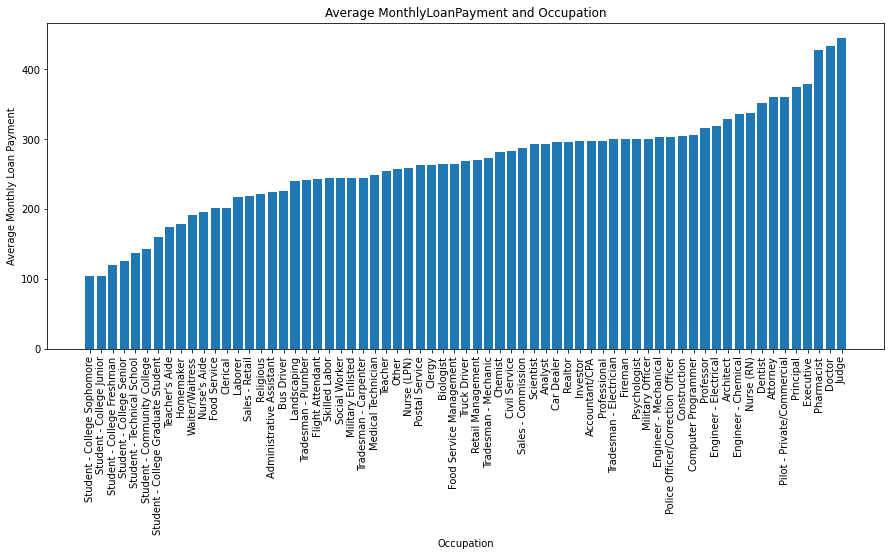

In [37]:
# Plot Average MonthlyLoanPayment and Occupation
plt.figure(figsize=[15, 6])
plt.bar(x = MLP_OCC_df['Occupation'],height= MLP_OCC_df['MonthlyLoanPayment']);
plt.xticks(rotation=90)

plt.title('Average MonthlyLoanPayment and Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Monthly Loan Payment');

> Average Monthly Loan Payment were the highest among Judge, Doctor, Pharmacist, Execuitive and Principal. Students belong to the lowest group. 

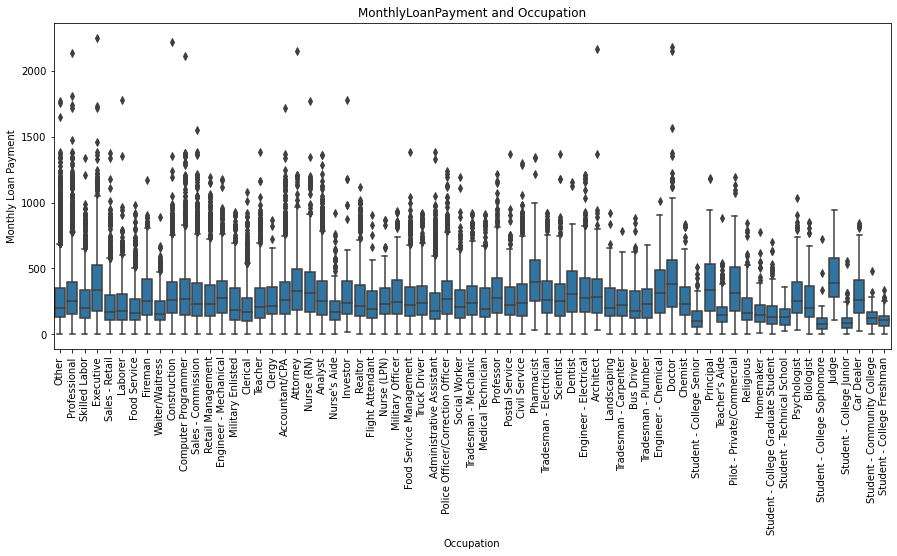

In [38]:
# Plot the distribution of MonthlyLoanPayment and Occupation
base_color = sb.color_palette()[0]
plt.figure(figsize=[15, 6])
sb.boxplot(data = loan_df2, x ='Occupation', y='MonthlyLoanPayment', color =base_color);
plt.xticks(rotation=90)

plt.title('MonthlyLoanPayment and Occupation')
plt.xlabel('Occupation')
plt.ylabel('Monthly Loan Payment');

> Seeing the distribution, the median monthly loan payments were not very different from each occupation. However, the max values of the monthly loan payment differ greatly from each occupation. We could guess that the differences in the average loan payment were made rather from the maximum values. 

In [39]:
# Make a dataframe that contains Average BorrowerRate and Occupation
ABR_OCC_df = pd.DataFrame(loan_df2.groupby(['Occupation'])['BorrowerRate'].mean())
ABR_OCC_df.reset_index(inplace=True)
ABR_OCC_df.sort_values(by=['BorrowerRate'], inplace=True)
ABR_OCC_df

,Occupation,BorrowerRate
26,Judge,0.151886
15,Doctor,0.160674
36,Pharmacist,0.164029
16,Engineer - Chemical,0.166985
12,Computer Programmer,0.167999
4,Attorney,0.168018
37,Pilot - Private/Commercial,0.168674
17,Engineer - Electrical,0.169228
49,Scientist,0.170432
42,Professor,0.170608


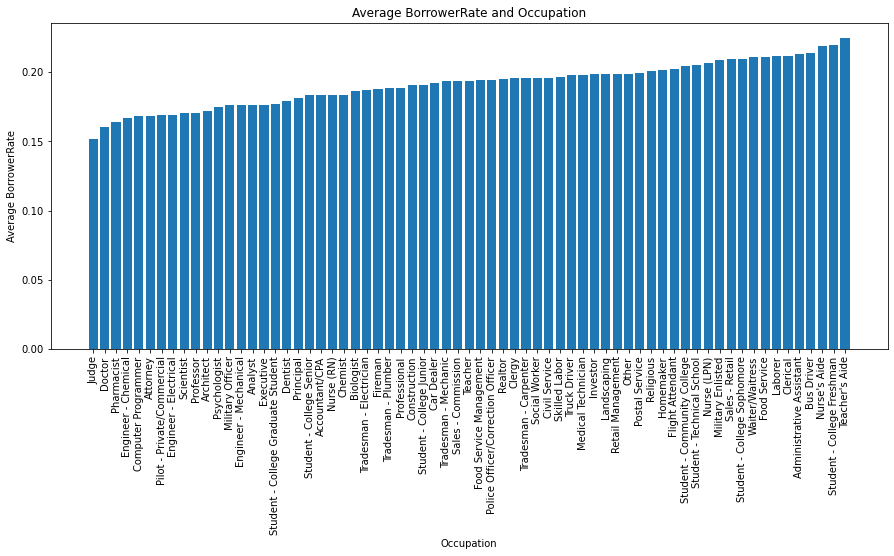

In [40]:
# Plot BorrowerRate and Occupation

plt.figure(figsize=[15, 6])
plt.bar(x = ABR_OCC_df['Occupation'],height= ABR_OCC_df['BorrowerRate']);
plt.xticks(rotation=90)

plt.title('Average BorrowerRate and Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average BorrowerRate');


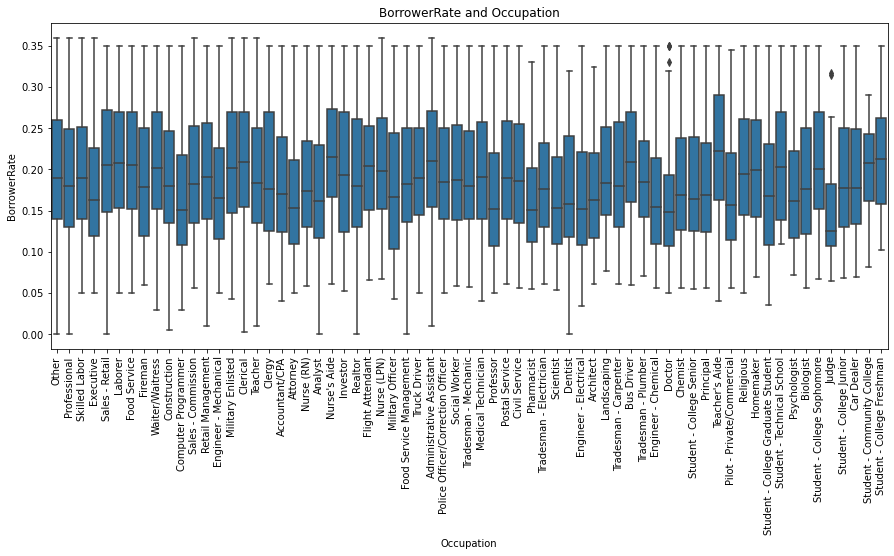

In [41]:
# Plot the distribution of BorrowerRate and Occupation
base_color = sb.color_palette()[0]
plt.figure(figsize=[15, 6])
sb.boxplot(data = loan_df2, x ='Occupation', y='BorrowerRate', color =base_color);
plt.xticks(rotation=90)

plt.title('BorrowerRate and Occupation')
plt.xlabel('Occupation')
plt.ylabel('BorrowerRate');

> From the results of bar chart and tha box chart of the average Borrower rate, we can confirm that the occupations with higher Average Monthly Loan Payment sucha as Judge, Doctor, Pharmacist, attorney can borrow money at a relatively lower interest rate. 

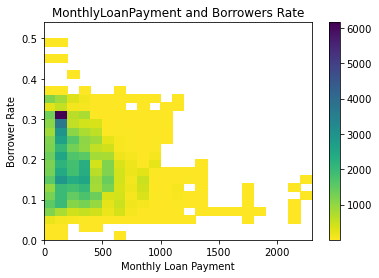

In [42]:
# MonthlyLoanPayment and the BorrowersRate

bins_x = np.arange(0, loan_df2['MonthlyLoanPayment'].max()+50, 100)
bins_y = np.arange(0, loan_df2['BorrowerRate'].max()+0.05, 0.02)

plt.hist2d(data = loan_df2, x = 'MonthlyLoanPayment', y = 'BorrowerRate',bins=[bins_x,bins_y],  cmap='viridis_r', cmin=0.5);
plt.colorbar()
plt.title('MonthlyLoanPayment and Borrowers Rate')
plt.xlabel('Monthly Loan Payment')
plt.ylabel('Borrower Rate');


> The Borrower Rate goes down as the monthly loan payment goes up. This can partially due to the fact that the borrowers of larger loan (judge, doctors, pharmacist, computer programmers) are the ones that can borrow at the lower Borrower Rate. 

In [43]:
loan_df2['StatedMonthlyIncome'].max()

1750002.916667

In [44]:
loan_df2['LoanStatus'].value_counts().index

Index(['Current', 'Completed', 'Chargedoff', 'Defaulted',
       'Past Due (1-15 days)', 'Past Due (31-60 days)',
       'Past Due (61-90 days)', 'Past Due (91-120 days)',
       'Past Due (16-30 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)', 'Cancelled'],
      dtype='object')

In [45]:
#Chnage the data types of LoanStatus to categories

loan_status_class=['Current', 'Completed', 'Chargedoff', 'Defaulted',
       'Past Due (1-15 days)', 'Past Due (31-60 days)',
       'Past Due (61-90 days)', 'Past Due (91-120 days)',
       'Past Due (16-30 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)', 'Cancelled']

loan_classes=pd.api.types.CategoricalDtype(ordered=True, categories = loan_status_class)
loan_df2['LoanStatus'] = loan_df2['LoanStatus'].astype(loan_classes);

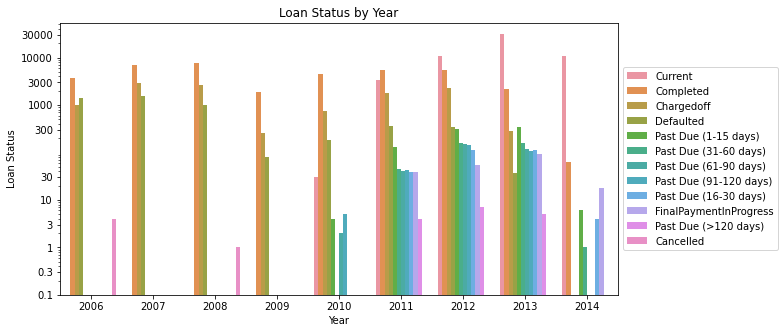

In [46]:
# plot the LoanStatus by years
plt.figure(figsize = [10,5])

ax = sb.countplot(data=loan_df2, x = 'ListingCreationYear', hue='LoanStatus')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

ticks = [0.1, 0.3, 1, 3,10, 30, 300, 1000, 3000, 10000, 30000]
labels = ['{}'.format(v) for v in ticks]
plt.yscale('log')
plt.yticks(ticks, labels)

plt.title('Loan Status by Year')
plt.xlabel('Year')
plt.ylabel('Loan Status');

> The number of default loan by years has fructuated: from 2006 to 2009, the default loan has decreased, but started increase again since 2009 and again started decreasing from 2012. Since 2010, loans with past dues have increased.   

In [47]:
# Seperate the dataframe 
default_df = loan_df2.query('LoanStatus == "Defaulted"')
nondefault_df = loan_df2.query('LoanStatus != "Defaulted"')

# create defaulted status array for each data frame
loan_default =np.repeat('Defaulted', default_df.shape[0])
nonloan_default =np.repeat('Notdefaulted', nondefault_df.shape[0])

# add the arrays to the dataframe
default_df['DefaultStatus'] = loan_default
nondefault_df['DefaultStatus'] = nonloan_default

# append and view dataframes
loan_df2_default = default_df.append(nondefault_df)
loan_df2_default.head()

<ipython-input-47-233d85c4e024>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  default_df['DefaultStatus'] = loan_default
<ipython-input-47-233d85c4e024>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nondefault_df['DefaultStatus'] = nonloan_default


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,Occupation,EmploymentStatus,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,ListingCreationYear,DefaultStatus
15,0F483544120452347F48121,577164,2012-04-10 09:14:46.297,NaN,36,Defaulted,2012-12-19,0.35797,0.3177,0.3077,0.2896,0.1650,0.1246,1.0,HR,5.0,Other,Other,True,False,NaN,2012-04-10 09:14:41,700.0,719.0,1999-03-08 00:00:00,10.0,9.0,18.0,5,300.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,9103.0,0.97,178.0,17.0,0.94,0.0,0.49,"$50,000-74,999",5500.000000,3EE2364952142596779635D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140,8.0,23,4000,2012-04-19 00:00:00,Q2 2012,924335448287456229847ED,173.71,2012,Defaulted
23,101B35764008108187B2EBA,758964,2013-04-22 13:29:19.073,NaN,36,Defaulted,2013-12-26,0.28032,0.2419,0.2319,0.2126,0.1075,0.1051,3.0,D,5.0,Skilled Labor,Employed,False,False,NaN,2013-04-22 13:29:14,680.0,699.0,1998-06-09 00:00:00,7.0,7.0,34.0,5,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7975.0,0.84,607.0,22.0,1.00,0.0,0.39,"$25,000-49,999",2500.000000,D0623679715048926AB9F4D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193,8.0,11,2000,2013-04-26 00:00:00,Q2 2013,93173576199169167625E6A,78.67,2013,Defaulted
107,10BE354254173728633D033,573446,2012-03-29 12:17:10.017,NaN,36,Defaulted,2012-12-23,0.35797,0.3177,0.3077,0.2896,0.1650,0.1246,1.0,HR,2.0,Administrative Assistant,Employed,False,False,NaN,2012-03-29 12:17:03,720.0,739.0,1987-03-01 00:00:00,16.0,12.0,46.0,12,910.0,1.0,9.0,0.0,0.0,0.0,1.0,0.0,9899.0,0.30,16554.0,45.0,1.00,5.0,0.54,"$25,000-49,999",2833.333333,7CFF3648516528223B4647C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,167,8.0,23,4000,2012-04-23 00:00:00,Q2 2012,2077354292658772372C378,173.71,2012,Defaulted
128,110A3373894473317F98123,57371,2006-11-05 12:48:42.960,HR,36,Defaulted,2007-11-14,0.18824,0.1700,0.1250,NaN,NaN,NaN,NaN,NaN,NaN,Other,Not available,True,True,783C3371218786870A73D20,2006-11-02 16:38:08.390000000,500.0,519.0,1991-07-01 00:00:00,NaN,NaN,22.0,3,55.0,5.0,5.0,9.0,NaN,20.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,Not displayed,2916.666667,3E543374129385598C2F1DD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162,12.0,88,1000,2006-11-16 00:00:00,Q4 2006,2CAE33715881115270D394A,35.65,2006,Defaulted
138,11273541569159931E84F17,569000,2012-03-16 09:22:33.393,NaN,36,Defaulted,2012-09-20,0.33973,0.2999,0.2899,0.2766,0.1490,0.1276,2.0,E,3.0,Military Enlisted,Employed,True,False,NaN,2012-03-06 11:00:20,620.0,639.0,2001-04-20 00:00:00,7.0,8.0,30.0,2,25.0,5.0,5.0,2.0,1890.0,23.0,0.0,0.0,72.0,0.07,928.0,27.0,0.75,1.0,0.35,"$25,000-49,999",3750.000000,A6773646313973238A33299,1.0,3.0,3.0,0.0,0.0,2000.0,0.0,-36.0,121,6.0,24,3000,2012-03-21 00:00:00,Q1 2012,87C83528199783859742DC3,127.34,2012,Defaulted


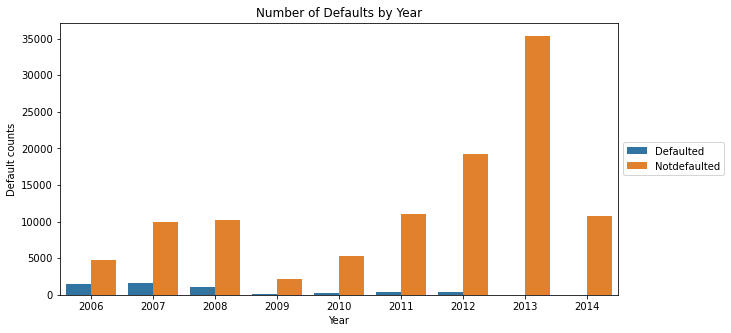

In [48]:
#Plot Defaulted Loan by year

plt.figure(figsize = [10,5])

ax = sb.countplot(data=loan_df2_default, x = 'ListingCreationYear', hue='DefaultStatus')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Number of Defaults by Year')
plt.xlabel('Year')
plt.ylabel('Default counts');

> The default has decreased from 2006 to 2009. This is contrary to our assumption that due to the financial crisis in 2008, the default rate could have increased. The number of the defaulted loans increased from 2010 to 2012 but the general default rate became lower than before. From 2013 to 2014, the number of the defaulted loan has decreased. 

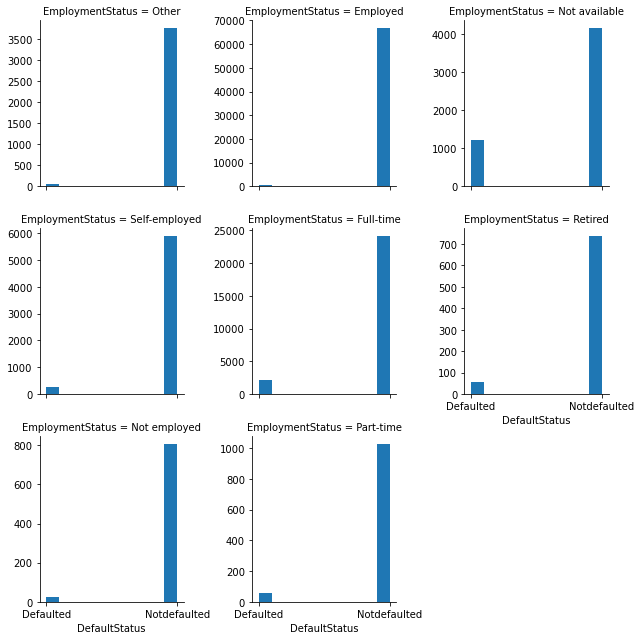

In [49]:
# Employment status and Defalted Loan 

g = sb.FacetGrid(data = loan_df2_default, col = 'EmploymentStatus', col_wrap=3, sharey=False)
g.map(plt.hist, 'DefaultStatus');

> The most number of the defaulted loan are from the borrowers with full-time employment status. This is also contrary to the common belief. The borrower with the employment status not available showed higher number of defaulted loan as well. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> - The median of the Borrower Rate decreased from 2006 to 2008, increased from 2008 to 2011 and again decreased from 2011 to 2014.
> -  The number of defaulted loan decreased from 2006 to 2009, increased from 2009 to 2012 but the general default rate from 2009 to 2012 are lower than from 2006 to 2009. From 2013 to 2014, the number of the defaulted loan has decreased. 
> - From the movement of the Borrow Rate and the number of the defaulted loan, we can assume that due to the lower borrow rate from 2006 to 2008, more people including higher default risk could borrow money. This can explain the relatively high number of default from 2006 to 2008. Moreover, it is likely that as the Borrower Rate increased from 2008 to 2011, the default number decreased in this period. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> - The higher your monthly income is, the lower the Borrower Rates are. In general, people with higher income had a bigger monthly loan to pay. 
> - The higher the monthly loan payments are, the lower the Borrower Rates are. In general, if you borrow more money, the risk is higher so the interest rate can be higher as well. However, it is likely that our results shows the opposite result because the people with higher income such as judge, doctors or pharmacists borrowed more money, and lower intereste rates were offered to them.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

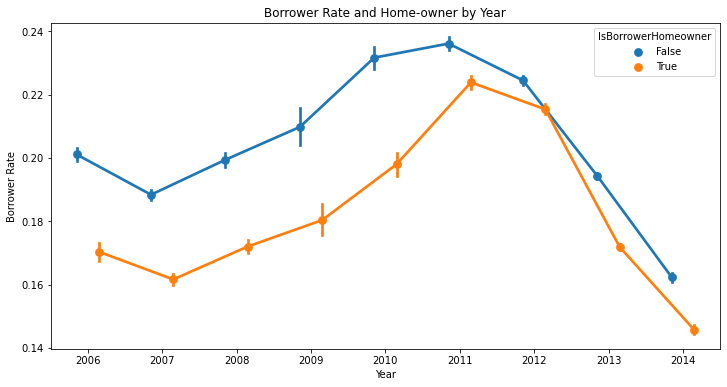

In [50]:
# Year, Borrower Rate and Homeowner 

plt.figure(figsize=[12,6])

ax = sb.pointplot(data = loan_df2, x = 'ListingCreationYear', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner',
                  dodge = 0.3, linestyles = "-")

plt.title('Borrower Rate and Home-owner by Year')
plt.xlabel('Year')
plt.ylabel('Borrower Rate');



> From the data, we can observe that the Borrower Rate of home-owners are lower in general than when you do not own a house. However, the differences between two groups were narrowed since 2010. We can assume that the financial crisis in 2008, which was triggered by the housing bubble crash in 2008 and the new low in 2012 might have contributed to the trend but further investigation is needed with more data with housing prices.

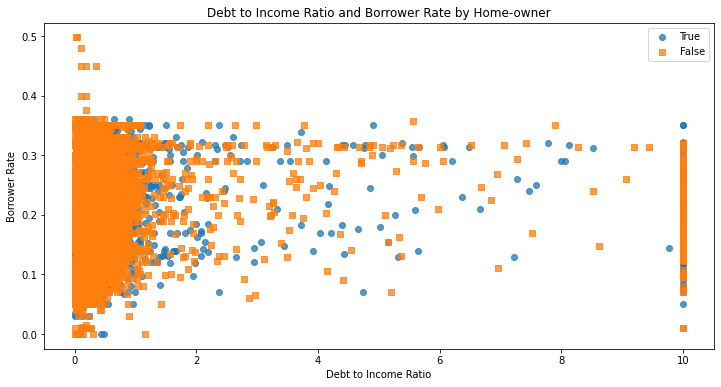

In [51]:
# DebtToIncomeRatio ,StatedMonthlyIncome ,Homeowner

plt.figure(figsize=[12,6])
cat_markers = [[True, 'o'],
               [False, 's']]


for cat, marker in cat_markers:
    df_cat = loan_df2[loan_df2['IsBorrowerHomeowner'] == cat]
    plt.scatter(data = df_cat, x = 'DebtToIncomeRatio', y = 'BorrowerRate', marker = marker, alpha =0.75)
plt.legend(['True','False'])


plt.title('Debt to Income Ratio and Borrower Rate by Home-owner')
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Borrower Rate');

> From the data, we can observe that most of the debt to income ratio are within 2 %. The Borrower rates are distributed evenly thoughout the Debt to income ratio. The outlier of the debt to income ratio 10 are noticeable, as non-house owners are distributed at the highest debt to income ratio. It looks like a risk factor.

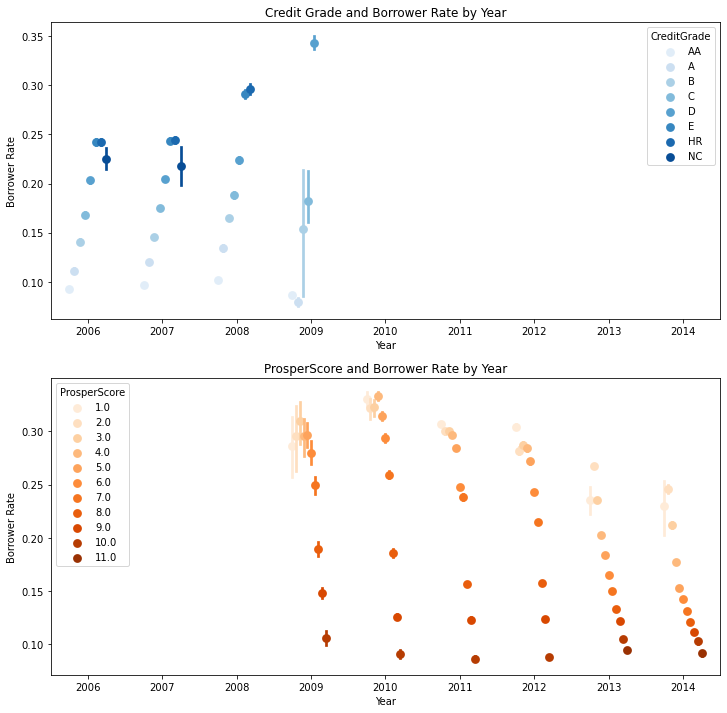

In [59]:
plt.figure(figsize=[12,12])

color1 = sb.color_palette("Blues", 8)
color2 = sb.color_palette("Oranges", 11)

credit_grading_order = ['AA','A', 'B', 'C', 'D', 'E', 'HR','NC']

plt.subplot(2,1,1)

ax1 = sb.pointplot(data = loan_df2, x = 'ListingCreationYear', y = 'BorrowerRate', hue = 'CreditGrade',
                  dodge = 0.5, linestyles = "", hue_order = credit_grading_order, palette = color1  )

plt.title('Credit Grade and Borrower Rate by Year')
plt.xlabel('Year')
plt.ylabel('Borrower Rate');

plt.subplot(2,1,2)

ax2 = sb.pointplot(data = loan_df2, x = 'ListingCreationYear', y = 'BorrowerRate', hue = 'ProsperScore',
                  dodge = 0.5, linestyles = "", palette = color2)

plt.title('ProsperScore and Borrower Rate by Year')
plt.xlabel('Year')
plt.ylabel('Borrower Rate');

> - From 2006 to 2008, under the Credit Grade system, the distribution of borrower rate among the risk groups has become larger. 
> - Switched to Prosper Score system, the gap of the Borrower Rate among the groups with different credit rates has increased from 2009 to 2010. Since 2011, the cap has been slowely narrowed, mainly due to the decrease of the Borrower Rate in the highly risky groups.  

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> - From the comparison of the borrower rate by the Credit Grade and the Prosper Score and by year, we could confirm that the most risky group (HR) from 2006 to 2008 could borrow money at a lower interest rate than from 2009 to 2011 period. This can explain the higher number of defaulted loans from 2006 to 2008 than the later period.

### Were there any interesting or surprising interactions between features?

> - From the observation of the borrower rate, home-owner and the year variables, we could observe that the differences in the borrower rate among the people who own a home and not have narrowed down since 2011. 
> - From the plot 'Debt to Income Ratio and Borrower Rate by Home-owner', we observed that the highest debt to income ratio was found among the non-home owner. It could be a possible risk factor and needs further investigation. 

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!